In [40]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.spatial.distance import cdist
import copy
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import tensorflow as tf

In [41]:
np.random.seed(1232)
# Extracting cifar10 data set
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
# Taking only the test data to build our model
X=x_test
Y=y_test
print("Shape of X is",X.shape)

Shape of X is (10000, 32, 32, 3)


In [42]:
# Adding labels to the cifar Data for visualization
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Visualizing the input data using matplot lib
import matplotlib.pyplot as plt
# Visualizing the data 
def visualize_data(X,Y):
    fig, axes = plt.subplots(ncols=5, nrows=3, figsize=(17, 8))
    index = 0
    for i in range(3):
        for j in range(5):
            axes[i,j].set_title(labels[Y[index][0]])
            axes[i,j].imshow(X[index],cmap='gray')
            axes[i,j].get_xaxis().set_visible(False)
            axes[i,j].get_yaxis().set_visible(False)
            index += 1
    plt.show()


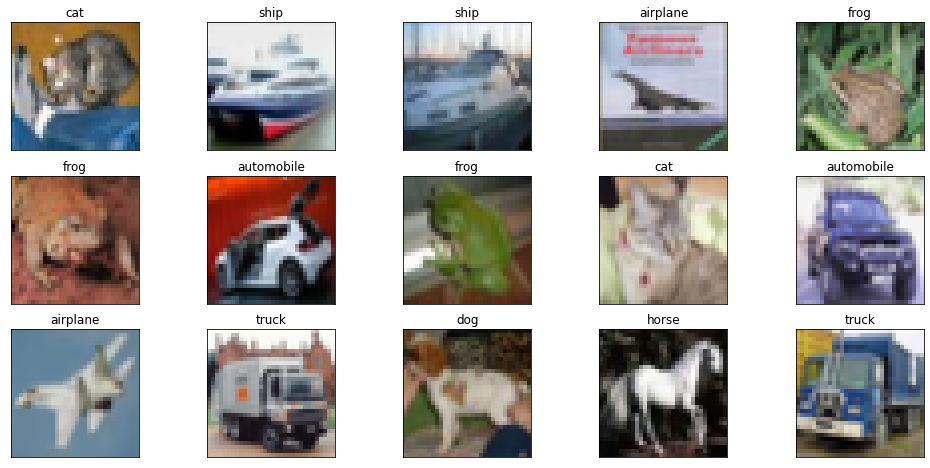

In [43]:
visualize_data(X,Y)

In [44]:
# Converting images to greyscale
X_Train = np.array(tf.image.rgb_to_grayscale(X))/255.0
# Removing the extra dimension
X_Train=np.squeeze(X_Train, axis=3)
X_Train[2]
print("Shape of the data after converting to greyscale",X_Train.shape)

Shape of the data after converting to greyscale (10000, 32, 32)


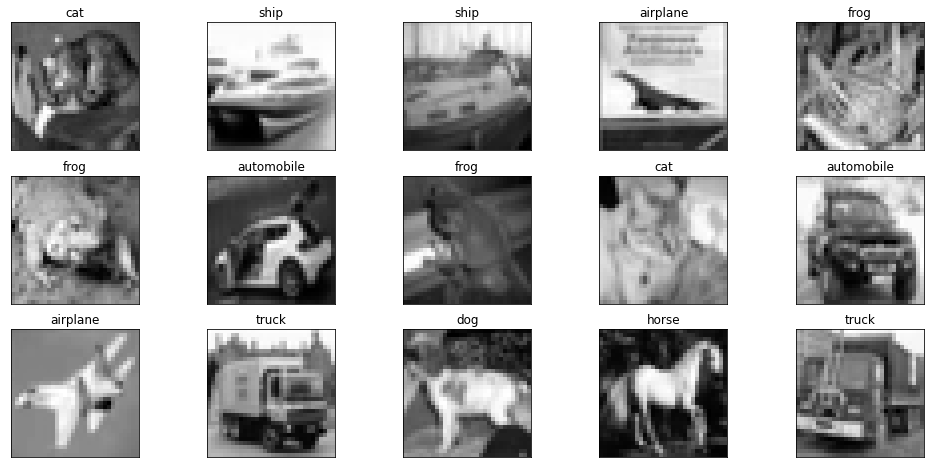

In [6]:
# Visualizing black and white images 
visualize_data(X_Train,Y)

In [7]:
# Retrieving the initial cluster centers randomly
centers=np.random.choice(X_Train.shape[0],10,replace=False)
print("initial center indexes are",centers)   
centeroids=[]
for i in centers:
    centeroids.append(X_Train[i])
centeroids=np.array(centeroids)
print(centeroids.shape)

initial center indexes are [2524 9588 2806 6984 1287 9861 5942 4651 8436 6383]
(10, 32, 32)


In [8]:
# Calculating the labels based on the shortest eucledian distance 
def calculate_lables(centeroids):
    y_lables = [];
    for image in X_Train :
        e_distance = [ np.sum((image-cluster)**2) for cluster in centeroids ] ;
        index_min = np.argmin(e_distance)
        y_lables.append(index_min)
    return y_lables;
# calculating the initial labels
y_lables=calculate_lables(centeroids)
y_lables

[5,
 7,
 0,
 0,
 5,
 6,
 9,
 6,
 8,
 0,
 5,
 0,
 9,
 9,
 5,
 5,
 6,
 6,
 7,
 5,
 1,
 0,
 9,
 5,
 8,
 2,
 6,
 0,
 1,
 9,
 9,
 5,
 5,
 2,
 0,
 9,
 0,
 0,
 0,
 5,
 2,
 9,
 9,
 6,
 5,
 0,
 5,
 5,
 6,
 5,
 0,
 5,
 9,
 3,
 0,
 3,
 6,
 9,
 0,
 6,
 8,
 5,
 9,
 4,
 6,
 9,
 2,
 8,
 9,
 4,
 0,
 6,
 0,
 5,
 4,
 0,
 1,
 5,
 9,
 7,
 0,
 9,
 5,
 0,
 0,
 0,
 9,
 7,
 7,
 3,
 5,
 9,
 0,
 0,
 9,
 0,
 6,
 5,
 0,
 0,
 6,
 6,
 9,
 4,
 6,
 4,
 9,
 9,
 6,
 6,
 5,
 8,
 0,
 5,
 0,
 1,
 8,
 0,
 9,
 6,
 0,
 9,
 5,
 0,
 0,
 2,
 0,
 9,
 6,
 0,
 8,
 0,
 1,
 1,
 1,
 6,
 4,
 0,
 5,
 0,
 5,
 0,
 0,
 3,
 3,
 0,
 9,
 5,
 6,
 5,
 0,
 3,
 9,
 0,
 6,
 5,
 8,
 4,
 6,
 6,
 1,
 9,
 5,
 5,
 4,
 6,
 0,
 5,
 0,
 4,
 0,
 0,
 0,
 3,
 5,
 4,
 6,
 0,
 5,
 0,
 0,
 1,
 6,
 5,
 0,
 5,
 9,
 6,
 8,
 0,
 7,
 6,
 3,
 9,
 6,
 9,
 0,
 7,
 6,
 5,
 1,
 7,
 1,
 6,
 3,
 8,
 9,
 0,
 0,
 0,
 2,
 0,
 8,
 0,
 0,
 0,
 7,
 0,
 7,
 6,
 0,
 5,
 5,
 5,
 3,
 6,
 0,
 8,
 0,
 1,
 9,
 1,
 5,
 9,
 0,
 6,
 9,
 4,
 7,
 0,
 9,
 5,
 0,
 0,
 6,
 9,
 6,
 0,
 5,
 9,


In [9]:
# calculating the centeroids based on mean
def calculate_centeroids(y_lables,K) :
  
    length = X_Train.shape[0];
#     print("len is",length)
    count = np.zeros(K);
#     print(count)
    image_sum = np.zeros(shape=(K , X_Train.shape[1] , X_Train.shape[2]));
# creating a list which will hold the images for a pirticular cluster based on cluster as index
    for i in range(length):
        index = y_lables[i];
#         print("X shs",X_Train[i].shape)
#         print("I shs",image_sum[index].shape)
        image_sum[index] += X_Train[i]; 
        count[index]+=1;
  #print(image_sum);
    clusters = [];
    j = 0;
#     Calculating the mean for every cluster and setting it as new cluster
    for s in image_sum:
        clusters.append(s/count[j]);
        j+= 1;
    return np.array(clusters);

In [10]:
y_lables_old=copy.deepcopy(y_lables)
y_lables_new=[]
count=0
# while old labels and new labels are not equal iterating and updating new centeroids and labels of the input data
while not (np.array_equal(y_lables_old , y_lables_new)) :
    count+=1
    print(count)
    if(count>1000):
        break
    y_lables_old = np.array(y_lables_old);
    y_lables_new = np.array(y_lables_new);
    if len(y_lables_new) != 0 :
        y_lables_old = copy.deepcopy(y_lables_new);
    centeroids1=calculate_centeroids(y_lables_old,10)
    y_lables_new = calculate_lables(centeroids1)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83


In [11]:
unique,count = np.unique(y_lables_new, return_counts=True)
frequencies = np.asarray((unique, count)).T
# Frequencies of each label is 
frequencies

array([[   0, 1605],
       [   1, 1016],
       [   2, 1325],
       [   3, 1067],
       [   4,  802],
       [   5, 1018],
       [   6,  927],
       [   7,  618],
       [   8,  775],
       [   9,  847]])

In [12]:
# calculating the silhouette score 
print(X_Train.reshape(10000,32*32)[0])
s = silhouette_score(X_Train.reshape(10000,32*32), y_lables_new)

[0.4627451  0.4627451  0.48235294 ... 0.25882353 0.29019608 0.22745098]


In [13]:
print("The Silhoutte score is :",s)

The Silhoutte score is : 0.05095328963484607


In [14]:
from validclust import dunn
from sklearn.metrics.pairwise import pairwise_distances

In [15]:
# pip install validclust

In [16]:
# calculating dunn's index
dist = pairwise_distances(X_Train.reshape(10000,32*32))
print("The dunn's index value is :",dunn(dist, y_lables_new))

The dunn's index value is : 0.0963560899374796


# AutoEncoders


In [64]:
X1=x_train
x_train=x_train.reshape(50000,3072)

In [65]:
# # Converting x_train into greyscale image
# x_train = np.array(tf.image.rgb_to_grayscale(x_train))
# # Removing the extra dimension
# x_train=np.squeeze(x_train, axis=3)
# x_train[2]
# print("Shape of the data after converting to greyscale",x_train.shape)

In [66]:
# scaling every image pixel into 0,1
# x_train=x_train/255.0

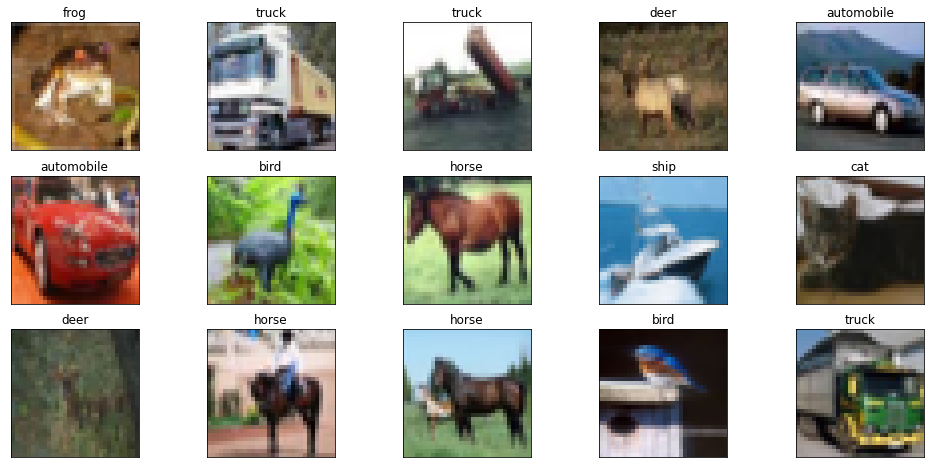

In [69]:
visualize_data(x_train.reshape(50000,32,32,3),y_train)

In [70]:
# Creating a neural network model in order to encode the 1024 dimensions into 128 dimensions
e_in = keras.Input(shape=(3072))
flattened_model = keras.layers.Flatten()(e_in)
e_out = keras.layers.Dense(1024, activation="relu")(flattened_model)

In [75]:
# Creating a neural network model in order to decode the 128 dimensions into original 1024 dimensions
d_in = keras.layers.Dense(1024, activation="relu")(e_out)
d_out = keras.layers.Dense(3072, activation="relu")(d_in)
# d_out = keras.layers.Reshape((32,32,3))(x)

In [76]:
# Creating an auto encoder with the created encoder and decoder
autoencoder = keras.Model(e_in, d_out, name='autoencoder')
autoencoder.compile(tf.keras.optimizers.Adam(lr=0.001),loss='mse')

In [77]:
history = autoencoder.fit(
      x_train,
      x_train,
      epochs=60, 
      batch_size=32, validation_split=0.20
        )   

Train on 40000 samples, validate on 10000 samples
Epoch 1/3
40000/40000 [==============================] - 79s 2ms/sample - loss: 1541.6731 - val_loss: 967.2015
Epoch 2/3
40000/40000 [==============================] - 78s 2ms/sample - loss: 945.5196 - val_loss: 907.3703
Epoch 3/3
40000/40000 [==============================] - 93s 2ms/sample - loss: 903.8790 - val_loss: 880.2896


In [78]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_18 (Dense)             (None, 3072)              3148800   
Total params: 7,345,152
Trainable params: 7,345,152
Non-trainable params: 0
_________________________________________________________________


In [79]:
ae_out = autoencoder.predict( x_train)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

[ 96.03445   73.91948   31.699135 ... 141.43158  114.58459   64.43741 ]


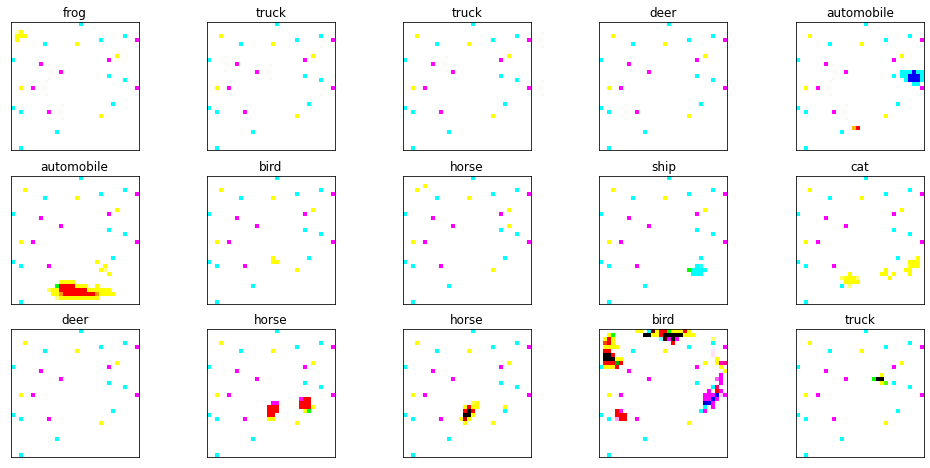

In [83]:
print(ae_out[0])
visualize_data(ae_out.reshape(50000,32,32,3),y_train)

In [84]:
# Importing kmeans from sklearn library
from sklearn.cluster import KMeans

In [86]:
# Creating a KMeans model with 10 clusters and fitting the model with the encoded data
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(ae_out.reshape(50000,3072))


KMeans(n_clusters=10, random_state=0)

In [88]:
silhouette_score(x_train.reshape(50000,32*32*3), kmeans.labels_)

0.050853287228505795